In [1]:
from normal_product_for_git import *

# Here we run equations 10 and 12 for reconciliation with MC simulation

##   Equation (10) 

$$ f_{Z}(z;\tilde{\lambda}_x,\tilde{\lambda}_y,s_x,s_y,\rho ) = \frac{1}{2\sqrt{2} \, s_x s_y}
\int_{z}^{\infty}
\frac{
\left[
\phi\left( \frac{\sqrt{x}}{s_y} + \frac{\sqrt{\tilde{\lambda}_y}}{s_y} \right)
+
\phi\left( \frac{\sqrt{x}}{s_y} - \frac{\sqrt{\tilde{\lambda}_y}}{s_y} \right)
\right]
}{\sqrt{x(x+z)}} \nonumber \\
\quad \times
\left[
\phi\left( \frac{\sqrt{x+z}}{s_x} + \frac{\sqrt{\tilde{\lambda}_x}}{s_x} \right)
+
\phi\left( \frac{\sqrt{x+z}}{s_x} - \frac{\sqrt{\tilde{\lambda}_x}}{s_x} \right)
\right] dx, $$

##   Equation (12) using equation (13)

$$f_{Z}(z; c,\tilde{\lambda}_x,\tilde{\lambda}_y,\sigma_x,\sigma_y,\rho)=\frac{1}{\pi}\sqrt{\frac{c}{2\sigma_x\sigma_y}}\,
   \exp\!\left(\frac{z\rho}{(1-\rho^2)\sigma_x\sigma_y}\right)\,
   \exp\!\left(-\frac{c}{2}\Big(|z|+\tilde{\lambda}_x(1-\operatorname{sgn}(z)\,\rho)
                                   +\tilde{\lambda}_y(1+\operatorname{sgn}(z)\,\rho)\Big)\right)
   \nonumber\\
\quad\times \frac{1}{4}\sum_{j=1}^{4}
   \Upsilon_j\!\left(z;c,\tilde{\lambda}_x,\tilde{\lambda}_y,\rho\right), $$

$$\Upsilon_j\!\left(z;c,\tilde{\lambda}_x,\tilde{\lambda}_y,\rho\right)
= \int_{0}^{\infty}
    \exp\!\Bigg(
      -c|z|\,t
      - c\sqrt{|z|\,t}\Big[
        (-1)^{\delta_{j,3}+\delta_{j,4}}\,\sqrt{\tilde{\lambda}_y}\,\big(1+\operatorname{sgn}(z)\,\rho\big)
        \nonumber\\[-2pt]
        \qquad\qquad\qquad\qquad\qquad
        +\,(-1)^{\delta_{j,2}+\delta_{j,4}}\,\sqrt{\tilde{\lambda}_x}\,\big(1-\operatorname{sgn}(z)\,\rho\big)\sqrt{1+\tfrac{1}{t}}
      \Big]\Bigg)\,
    \frac{dt}{\sqrt{t(1+t)}},\\ \nonumber
\qquad j=1,2,3,4.\quad $$

11.991976433487903
-2.8894519394241005


C:\Users\aheki\AppData\Local\Temp\ipykernel_14888\1599733559.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rvsvcorr,kde=False,hist=True,norm_hist=True,color='orange')


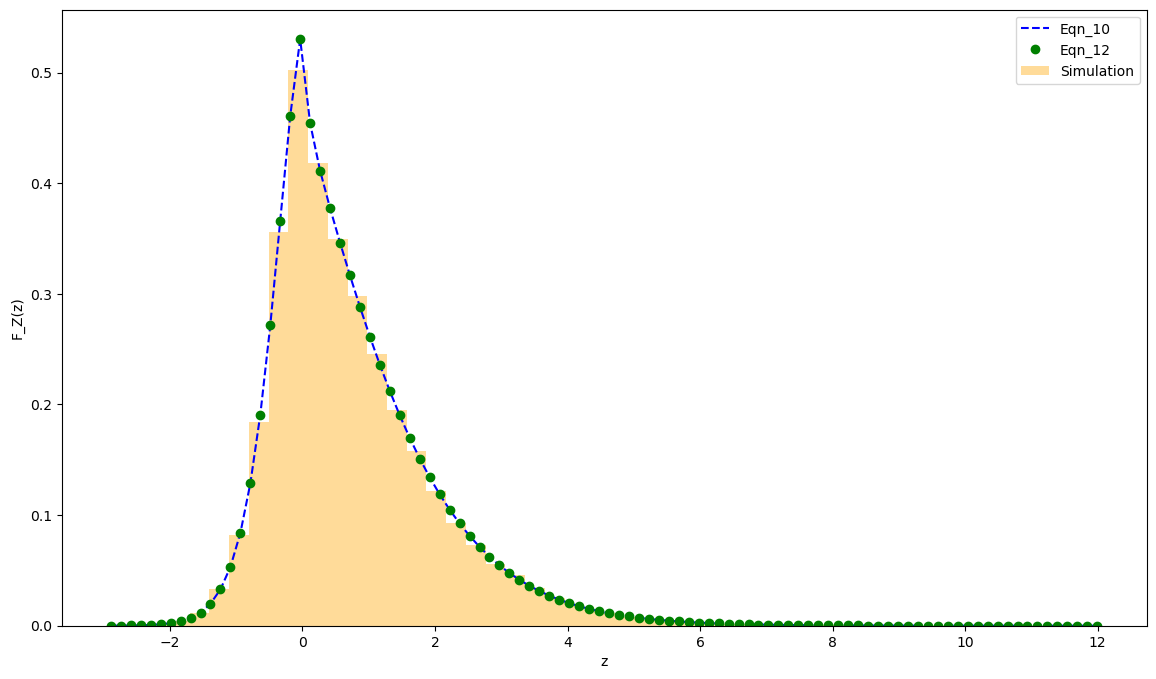

In [3]:
#%%
mm1,mm2,ss1,ss2,rr=1.0,0.5,2.0,0.2,0.6
bivr=mvn.rvs([mm1,mm2],cov=[[ss1**2,rr*ss1*ss2],[rr*ss1*ss2,ss2**2]],size=100000)
rvsvcorr=bivr[:,0]*bivr[:,1]
xmincorr=rvsvcorr.min()
xmaxcorr=rvsvcorr.max()
zzcorr=np.linspace(xmincorr,xmaxcorr,100)
ecdfcor=ECDF(rvsvcorr)
cdfsimcorr=ecdfcor(zzcorr)
print(rvsvcorr.max())
print(rvsvcorr.min())
zzcorr=np.linspace(xmincorr,xmaxcorr,100)
fchcorr=Pnormprodpdfbynchi2(zzcorr,[mm1,mm2,ss1,ss2,rr],True,False)
semiApdf=[getfnFsxsyN(xz,ss1,ss2,mm1,mm2,rr)[0] for xz in zzcorr]
#%%
plt.figure(figsize=(14, 8))
sns.distplot(rvsvcorr,kde=False,hist=True,norm_hist=True,color='orange')
#sns.histplot(rvsvcorr,kde=False,stat='density')
plt.plot(zzcorr,fchcorr,'--',color='blue')
plt.plot(zzcorr,semiApdf,'o',color='green')
plt.legend(['Eqn_10','Eqn_12','Simulation'])
# plt.grid(True)
plt.xlabel("z")
plt.ylabel("F_Z(z)")
plt.show()